___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [266]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime


import pandas_datareader
import datetime
from pandas_datareader import data as wb
from statsmodels.tsa.seasonal import seasonal_decompose

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [268]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

5.5.0


In [269]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [270]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)


BAC = data.DataReader("BAC", 'stooq', start, end )
C = data.DataReader("C", 'stooq', start, end)
GS = data.DataReader("GS", 'stooq', start, end)
JPM = data.DataReader("JPM", 'stooq', start, end)
MS = data.DataReader("MS", 'stooq', start, end)
WFC = data.DataReader("WFC", 'stooq', start, end)


tickers =['BAC', 'C', 'GS','JPM','MS','WFC']

pf = pd.DataFrame()
for t in tickers:
    pf[t] = data.DataReader(t,'stooq',start, end )

    

In [76]:
BAC

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-04,47.080,48.690,46.680,48.280,60297055
2022-02-03,47.220,47.290,46.350,46.430,35879926
2022-02-02,46.720,46.960,46.301,46.890,41125582
2022-02-01,46.205,47.100,45.900,46.940,40326643
2022-01-31,45.520,46.270,45.220,46.140,44793662
...,...,...,...,...,...
2017-02-10,21.044,21.088,20.835,20.945,99714851
2017-02-09,20.653,21.007,20.546,20.979,113017946
2017-02-08,20.627,20.627,20.372,20.574,112667660


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [77]:
tickers =['BAC', 'C', 'GS','JPM','MS','WFC']

In [86]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [79]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [80]:
bank_stocks.head()

BAC                                      C                 \
              Open   High     Low  Close    Volume   Open   High     Low   
Date                                                                       
2022-02-04  47.080  48.69  46.680  48.28  60297055  65.04  66.66  64.840   
2022-02-03  47.220  47.29  46.350  46.43  35879926  66.26  66.38  65.030   
2022-02-02  46.720  46.96  46.301  46.89  41125582  66.35  66.80  65.575   
2022-02-01  46.205  47.10  45.900  46.94  40326643  65.44  66.69  65.040   
2022-01-31  45.520  46.27  45.220  46.14  44793662  64.01  65.25  63.600   

                             ...       MS                                    \
            Close    Volume  ...     Open     High     Low   Close   Volume   
Date                         ...                                              
2022-02-04  66.08  23267883  ...  102.150  105.020  102.07  104.11  7881822   
2022-02-03  65.26  18219140  ...  103.665  104.100  102.13  102.29  5986480   
2022-02-02  66.23  18194244  ...  103.800  104.300  102.30  103.92  9596278   
2022-02-01  66.56  26868430  ...  102.960  104.100  102.24  103.95  7885683   
2022-01-31  65.12  23067400  ...  100.970  102.735  100.28  102.54  8467016   

              WFC                                    
             Open     High     Low  Close    Volume  
Date                                                 
2022-02-04  56.04  57.0400  55.470  56.33  33622141  
2022-02-03  55.84  56.2850  54.725  55.17  25227381  
2022-02-02  55.27  56.0500  54.960  55.93  29037133  
2022-02-01  54.72  55.8050  53.990  55.60  35870234  
2022-01-31  53.82  54.0504  53.030  53.80  34657457  

[5 rows x 30 columns]

In [8]:
##mult-level index ^^

** Set the column name levels (this is filled out for you):**

In [81]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [93]:
bank_stocks.head()

Bank Ticker     BAC                                      C                 \
Stock Info     Open   High     Low  Close    Volume   Open   High     Low   
Date                                                                        
2022-02-04   47.080  48.69  46.680  48.28  60297055  65.04  66.66  64.840   
2022-02-03   47.220  47.29  46.350  46.43  35879926  66.26  66.38  65.030   
2022-02-02   46.720  46.96  46.301  46.89  41125582  66.35  66.80  65.575   
2022-02-01   46.205  47.10  45.900  46.94  40326643  65.44  66.69  65.040   
2022-01-31   45.520  46.27  45.220  46.14  44793662  64.01  65.25  63.600   

Bank Ticker                   ...       MS                                    \
Stock Info   Close    Volume  ...     Open     High     Low   Close   Volume   
Date                          ...                                              
2022-02-04   66.08  23267883  ...  102.150  105.020  102.07  104.11  7881822   
2022-02-03   65.26  18219140  ...  103.665  104.100  102.13  102.29  5986480   
2022-02-02   66.23  18194244  ...  103.800  104.300  102.30  103.92  9596278   
2022-02-01   66.56  26868430  ...  102.960  104.100  102.24  103.95  7885683   
2022-01-31   65.12  23067400  ...  100.970  102.735  100.28  102.54  8467016   

Bank Ticker    WFC                                    
Stock Info    Open     High     Low  Close    Volume  
Date                                                  
2022-02-04   56.04  57.0400  55.470  56.33  33622141  
2022-02-03   55.84  56.2850  54.725  55.17  25227381  
2022-02-02   55.27  56.0500  54.960  55.93  29037133  
2022-02-01   54.72  55.8050  53.990  55.60  35870234  
2022-01-31   53.82  54.0504  53.030  53.80  34657457  

[5 rows x 30 columns]

** Check the head of the bank_stocks dataframe.**

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [102]:
for t in tickers:
    print(t,bank_stocks[t]['Close'].max())

BAC 49.21
C 78.69800000000001
GS 423.85
JPM 171.78
MS 105.92
WFC 58.41


In [71]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     49.210
C       78.698
GS     423.850
JPM    171.780
MS     105.920
WFC     58.410
dtype: float64

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [121]:
returns = pd.DataFrame()

In [122]:
for tick in tickers:
    returns[tick+'_Return']=bank_stocks[tick]['Close'].pct_change()

In [124]:
returns.head()

,BAC_Return,C_Return,GS_Return,JPM_Return,MS_Return,WFC_Return
Date,,,,,,
2022-02-04,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-03,-0.038318,-0.012409,-0.023721,-0.025302,-0.017482,-0.020593
2022-02-02,0.009907,0.014864,0.011647,0.008339,0.015935,0.013776
2022-02-01,0.001066,0.004983,0.002754,0.008070,0.000289,-0.005900
2022-01-31,-0.017043,-0.021635,-0.025765,-0.016871,-0.013564,-0.032374


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

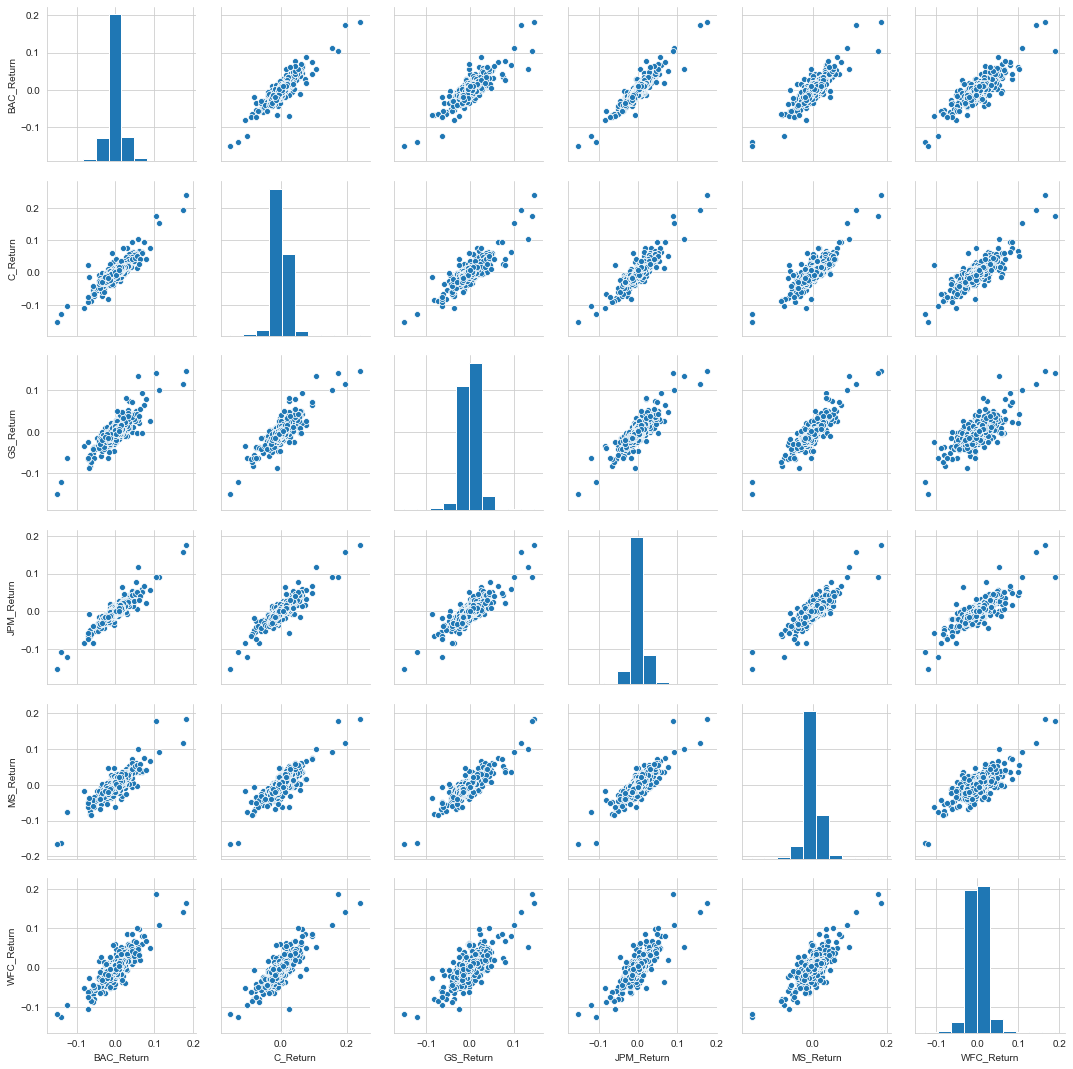

In [140]:
sns.pairplot(returns[1:])

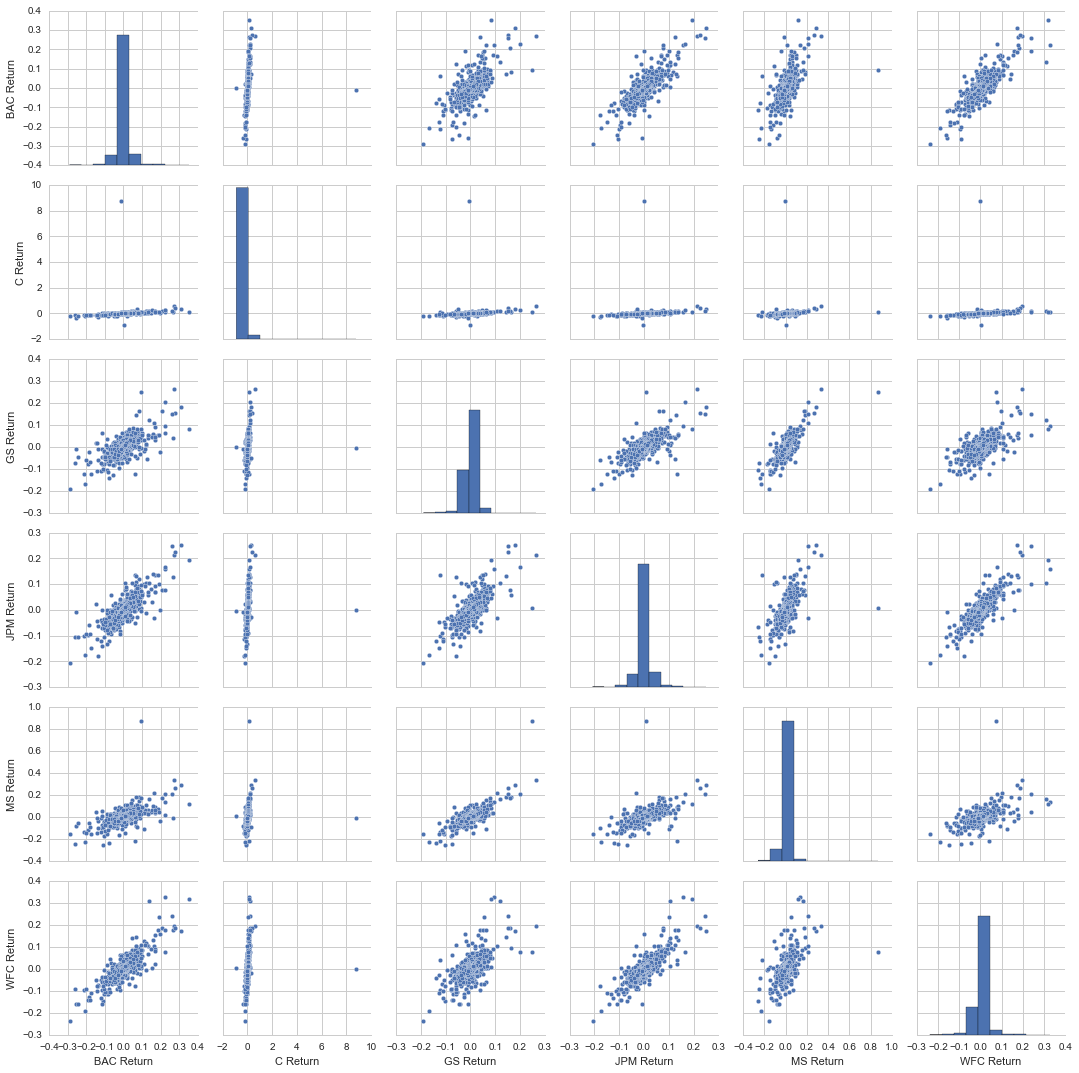

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [146]:
returns.idxmin()

BAC_Return   2020-03-12
C_Return     2020-03-12
GS_Return    2020-03-12
JPM_Return   2020-03-12
MS_Return    2020-03-12
WFC_Return   2020-03-23
dtype: datetime64[ns]

In [147]:
returns.idxmax()

BAC_Return   2020-03-13
C_Return     2020-03-13
GS_Return    2020-03-13
JPM_Return   2020-03-13
MS_Return    2020-03-13
WFC_Return   2020-03-11
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [149]:
returns.std()

BAC_Return    0.021351
C_Return      0.023472
GS_Return     0.020084
JPM_Return    0.019110
MS_Return     0.021294
WFC_Return    0.022427
dtype: float64

In [175]:
returns.index.year.unique()

Int64Index([2022, 2021, 2020, 2019, 2018, 2017], dtype='int64', name='Date')

In [166]:
returns.index.year.max()

2022

In [188]:
returns[returns.index.year==2017]['MS_Return']

Date
2017-12-29    0.005420
2017-12-28    0.003425
2017-12-27   -0.001517
2017-12-26   -0.001899
2017-12-22    0.004778
                ...   
2017-02-10   -0.012337
2017-02-09    0.003349
2017-02-08   -0.020933
2017-02-07    0.021817
2017-02-06   -0.005419
Name: MS_Return, Length: 228, dtype: float64

In [168]:
returns[returns.index.year==2017].std()

BAC_Return    0.013346
C_Return      0.010764
GS_Return     0.012185
JPM_Return    0.009943
MS_Return     0.012406
WFC_Return    0.010811
dtype: float64

In [184]:
returns.loc["2017-01-01":"2017-12-31"].std()

BAC_Return   NaN
C_Return     NaN
GS_Return    NaN
JPM_Return   NaN
MS_Return    NaN
WFC_Return   NaN
dtype: float64

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

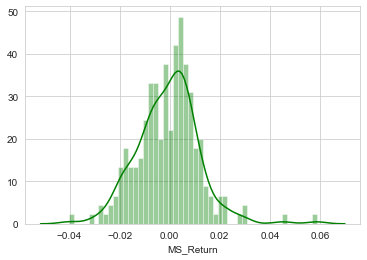

In [195]:
sns.distplot(returns[returns.index.year==2017]['MS_Return'], color='green', bins=50)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



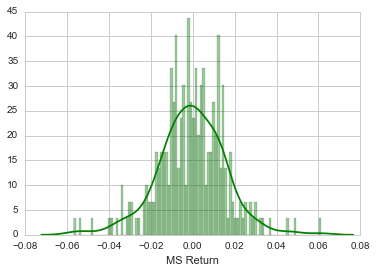

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

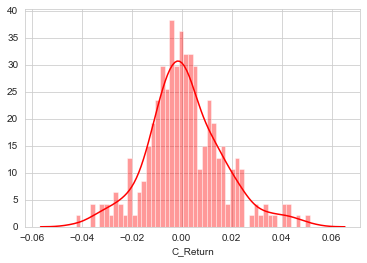

In [194]:
sns.distplot(returns[returns.index.year==2018]['C_Return'], color='red', bins=50)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



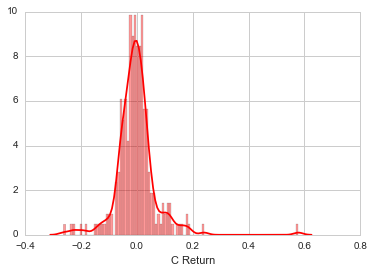

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

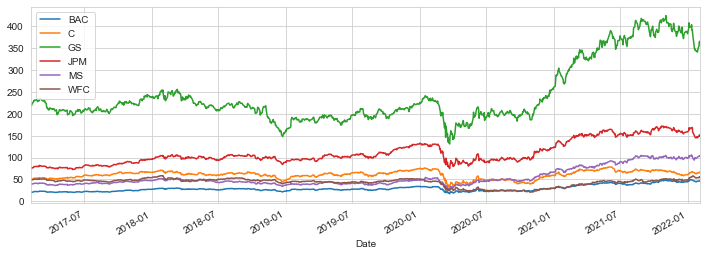

In [197]:
for t in tickers:
    bank_stocks[t]['Close'].plot(label=t, figsize=(12,4))
plt.legend()

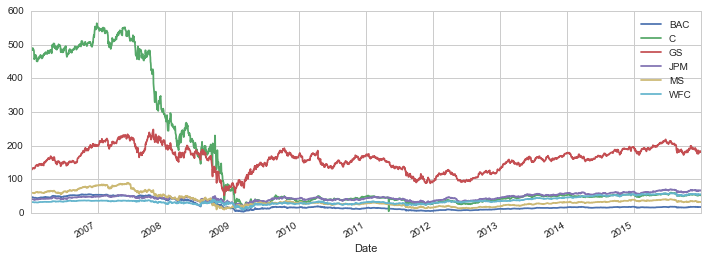

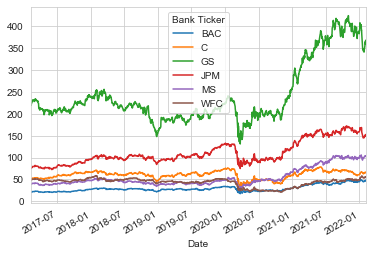

In [199]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot()

In [200]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

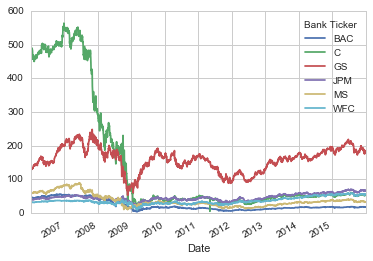

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

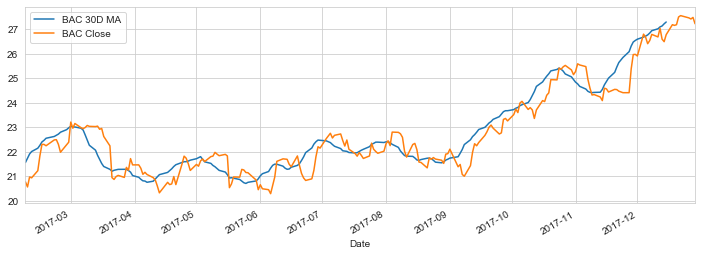

In [212]:
plt.figure(figsize=(12,4))
BAC[BAC.index.year==2017]['Close'].rolling(window=10).mean().plot(label='BAC 30D MA')
BAC[BAC.index.year==2017]['Close'].plot(label='BAC Close')
plt.legend()

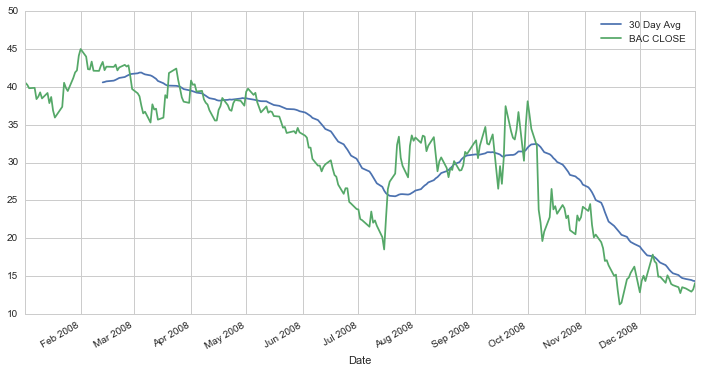

** Create a heatmap of the correlation between the stocks Close Price.**

In [219]:
#correlation against Close Price 
bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.673135,0.913838,0.968249,0.924674,0.304542
C,0.673135,1.000000,0.584387,0.632859,0.496845,0.680915
GS,0.913838,0.584387,1.000000,0.890358,0.975330,0.258447
JPM,0.968249,0.632859,0.890358,1.000000,0.919360,0.143162
MS,0.924674,0.496845,0.975330,0.919360,1.000000,0.117169
WFC,0.304542,0.680915,0.258447,0.143162,0.117169,1.000000


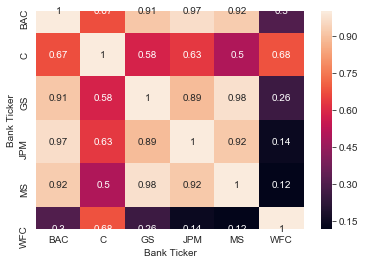

In [220]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)

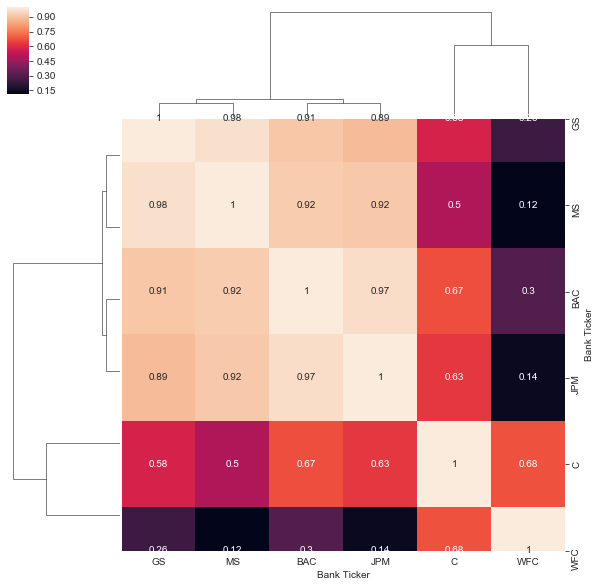

In [221]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)

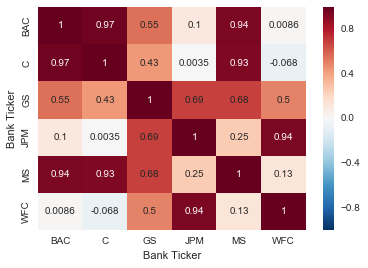

** Optional: Use seaborn's clustermap to cluster the correlations together:**

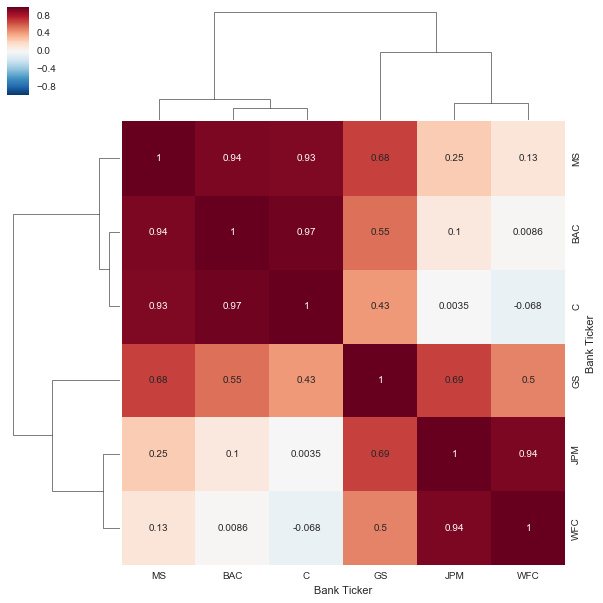

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [222]:
Close_Corr =bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [223]:
Close_Corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.673135,0.913838,0.968249,0.924674,0.304542
C,0.673135,1.000000,0.584387,0.632859,0.496845,0.680915
GS,0.913838,0.584387,1.000000,0.890358,0.975330,0.258447
JPM,0.968249,0.632859,0.890358,1.000000,0.919360,0.143162
MS,0.924674,0.496845,0.975330,0.919360,1.000000,0.117169
WFC,0.304542,0.680915,0.258447,0.143162,0.117169,1.000000


**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [227]:
Close_Corr.iplot(kind='heatmap',colorscale='rdylbu')

In [231]:
BAC18=BAC[BAC[['Open', 'High', 'Low','Close']].index.year==2018]

In [232]:
BAC18.iplot(kind='candle')

In [244]:
MS_2018_Close=MS[MS.index.year==2018]['Close']

In [246]:
MS_2018_Close.ta_plot(study='sma', periods=[13,21,55])

In [247]:
BAC_2018_Close=MS[BAC.index.year==2018]['Close']

In [248]:
BAC_2018_Close.ta_plot(study='boll')

In [254]:
cf.help()

Use 'cufflinks.help(figure)' to see the list of available parameters for the given figure.
Use 'DataFrame.iplot(kind=figure)' to plot the respective figure
Figures:
	bar
	box
	bubble
	bubble3d
	candle
	choroplet
	distplot
	heatmap
	histogram
	ohlc
	pie
	ratio
	scatter
	scatter3d
	scattergeo
	spread
	surface
	violin


In [262]:
cf.datagen

AttributeError: module 'cufflinks' has no attribute 'BAC'

In [264]:

BAC18=BAC[BAC[['Open', 'High', 'Low','Close']].index.year==2018]
qf=cf.QuantFig(BAC18,title='BofA ',legend='top',name='BAC')
qf.add_bollinger_bands()
qf.iplot()

In [265]:
qf.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_rsi(periods=20,color='java')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
##qf.add_volume()
qf.add_macd()
qf.iplot()

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.